In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = 12, 10
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from itertools import product

In [8]:
data = pd.read_csv('AirQualityUCI.csv')
#data = data.rename(columns={'Monthly Mean Total Sunspot Number':'Sunspots'})
#data = data.drop('Unnamed: 0', axis=1)
data.info()
data['Date'] = pd.to_datetime(data['Date']+' '+data['Time'])
data.set_index('Date', inplace = True)
#data['Sunspots'] = pd.to_numeric(data['Sunspots'], downcast='float')
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   int64  
 4   NMHC(GT)       9357 non-null   int64  
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   int64  
 7   NOx(GT)        9357 non-null   int64  
 8   PT08.S3(NOx)   9357 non-null   int64  
 9   NO2(GT)        9357 non-null   int64  
 10  PT08.S4(NO2)   9357 non-null   int64  
 11  PT08.S5(O3)    9357 non-null   int64  
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(5), int64(8), object(2)
memory usage: 1.1+ MB


,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Date,,,,,,,,,,,,,,
2004-03-10 18:00:00,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
2004-03-10 19:00:00,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2004-03-10 20:00:00,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
2004-03-10 21:00:00,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
2004-03-10 22:00:00,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-04-04 10:00:00,10:00:00,3.1,1314,-200,13.5,1101,472,539,190,1374,1729,21.9,29.3,0.7568
2005-04-04 11:00:00,11:00:00,2.4,1163,-200,11.4,1027,353,604,179,1264,1269,24.3,23.7,0.7119
2005-04-04 12:00:00,12:00:00,2.4,1142,-200,12.4,1063,293,603,175,1241,1092,26.9,18.3,0.6406


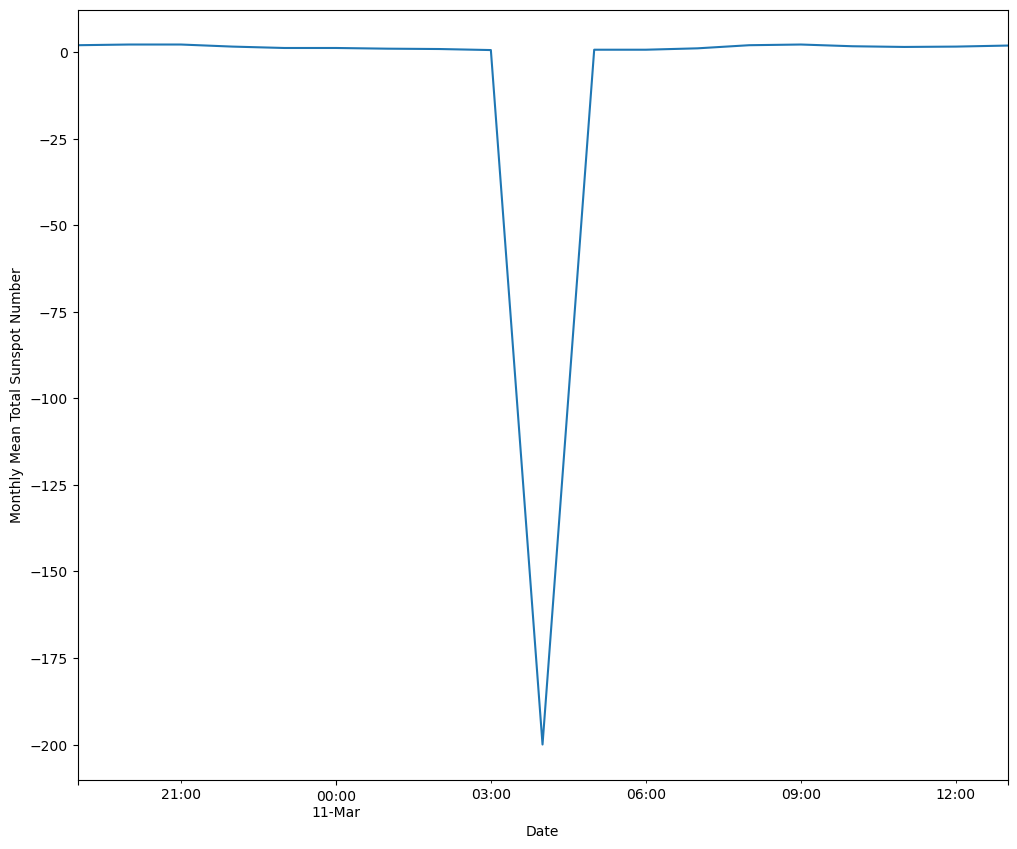

In [14]:
data['CO(GT)'].iloc[1:20].plot()
plt.ylabel('Monthly Mean Total Sunspot Number');

Критерий Дики-Фуллера: p=0.000000
(-9.552224712392938, 2.5537621262018864e-16, 28, 9328, {'1%': -3.43105123289464, '5%': -2.861849900767839, '10%': -2.566934955096094}, 92255.77921115665)


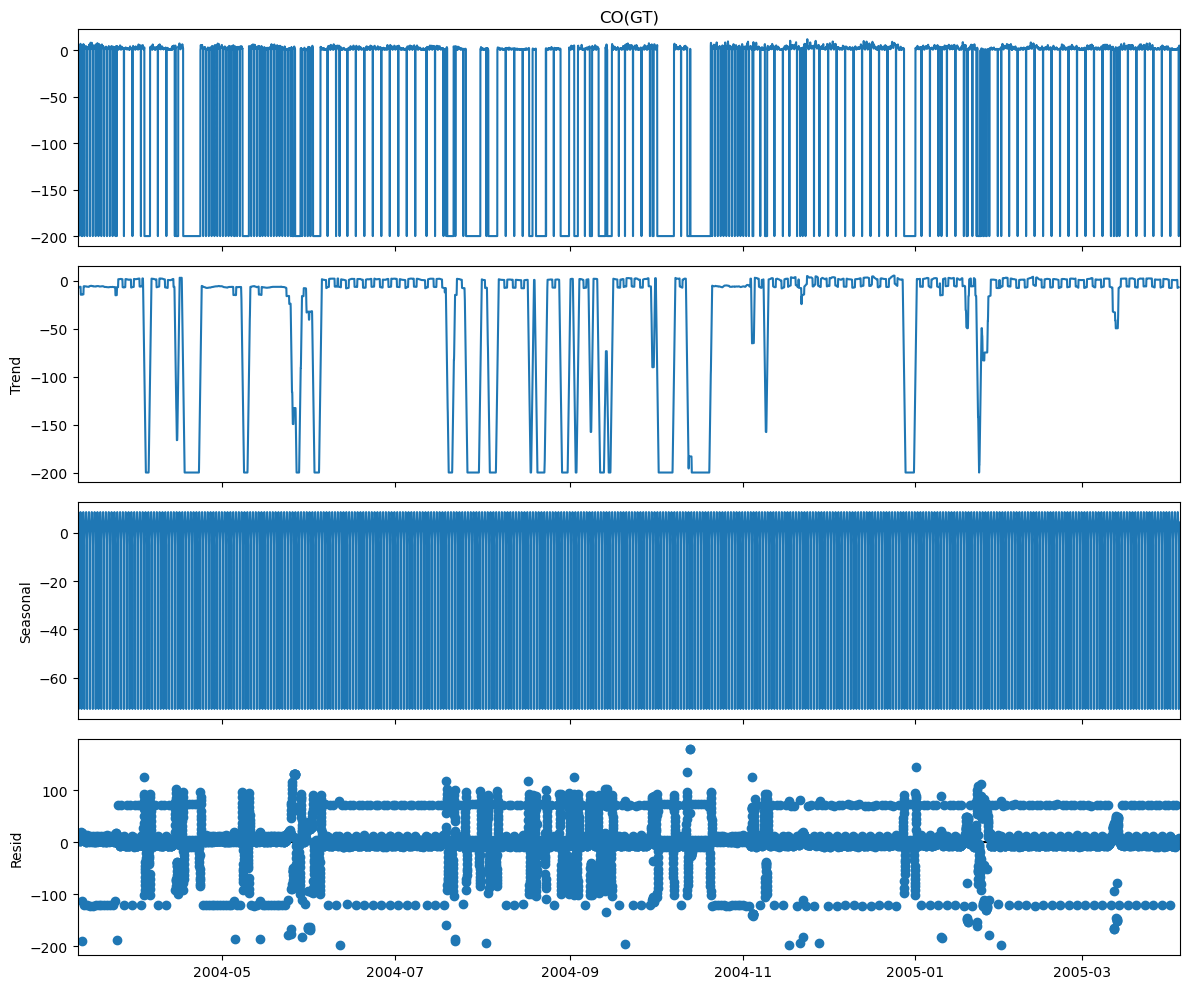

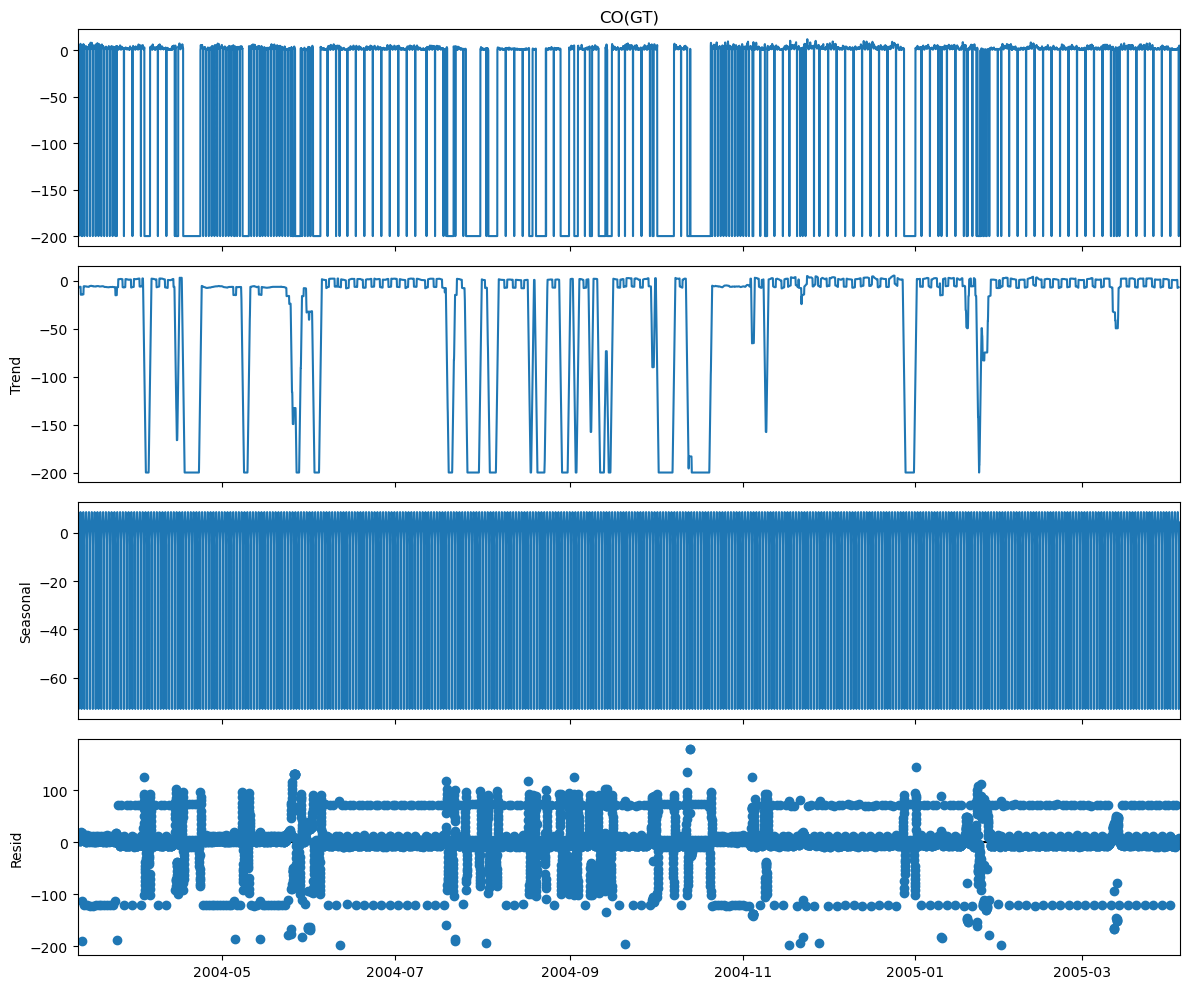

In [11]:
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(data['CO(GT)'])[1])
print(sm.tsa.stattools.adfuller(data['CO(GT)']))
sm.tsa.seasonal_decompose(data['CO(GT)']).plot()

Критерий Дики-Фуллера: p=0.000000


(-16.207358630541336,
 4.019360267915759e-29,
 37,
 9307,
 {'1%': -3.4310528155695414,
  '5%': -2.8618506001277155,
  '10%': -2.5669353273682},
 92871.63306494798)

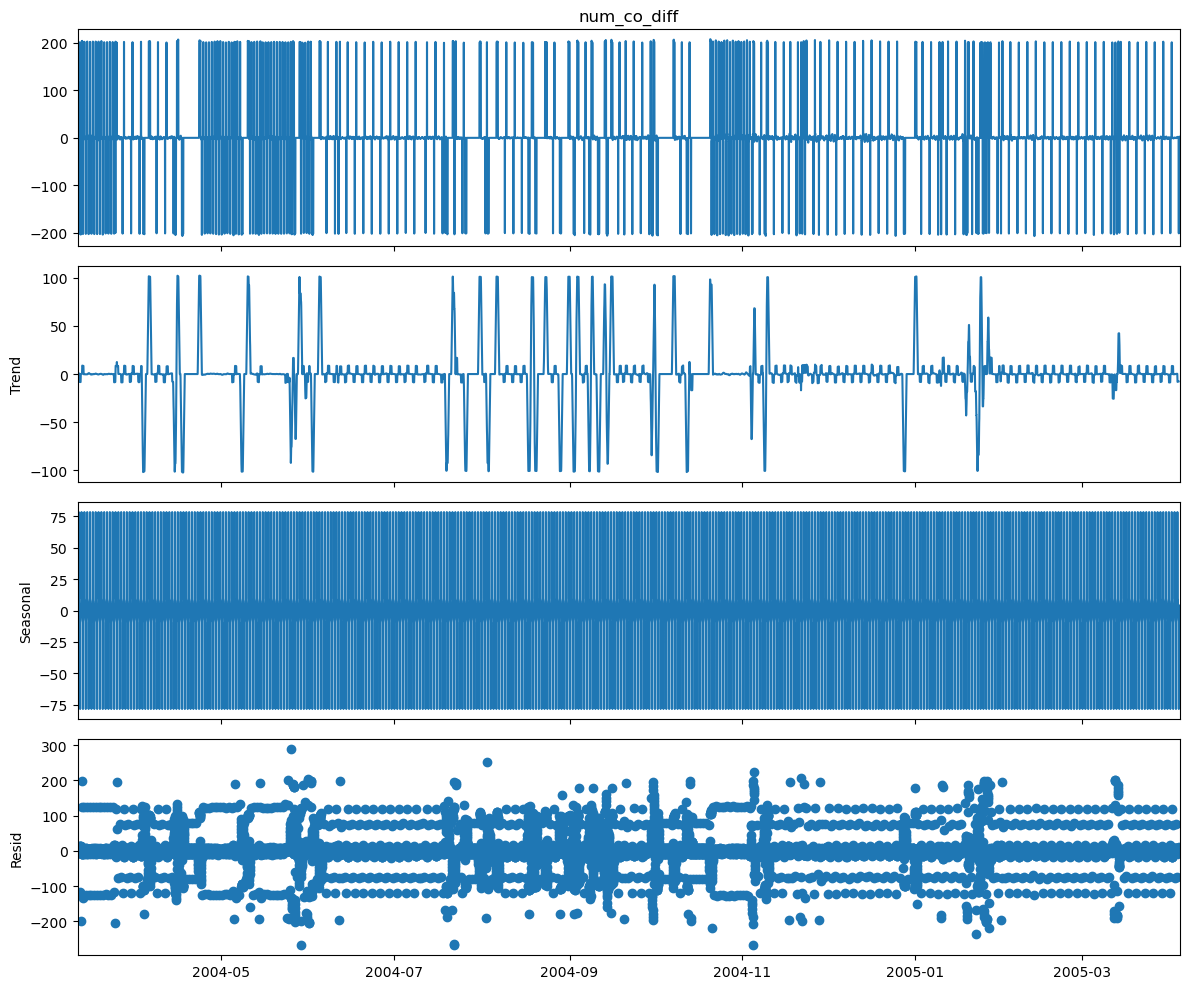

In [21]:
i = 12
data['num_co_diff'] = data['CO(GT)'] - data['CO(GT)'].shift(i)
sm.tsa.seasonal_decompose(data['num_co_diff'][i:]).plot()
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(data['num_co_diff'][i:])[1])
sm.tsa.stattools.adfuller(data['num_co_diff'][i:])

Критерий Дики-Фуллера: p=0.000000


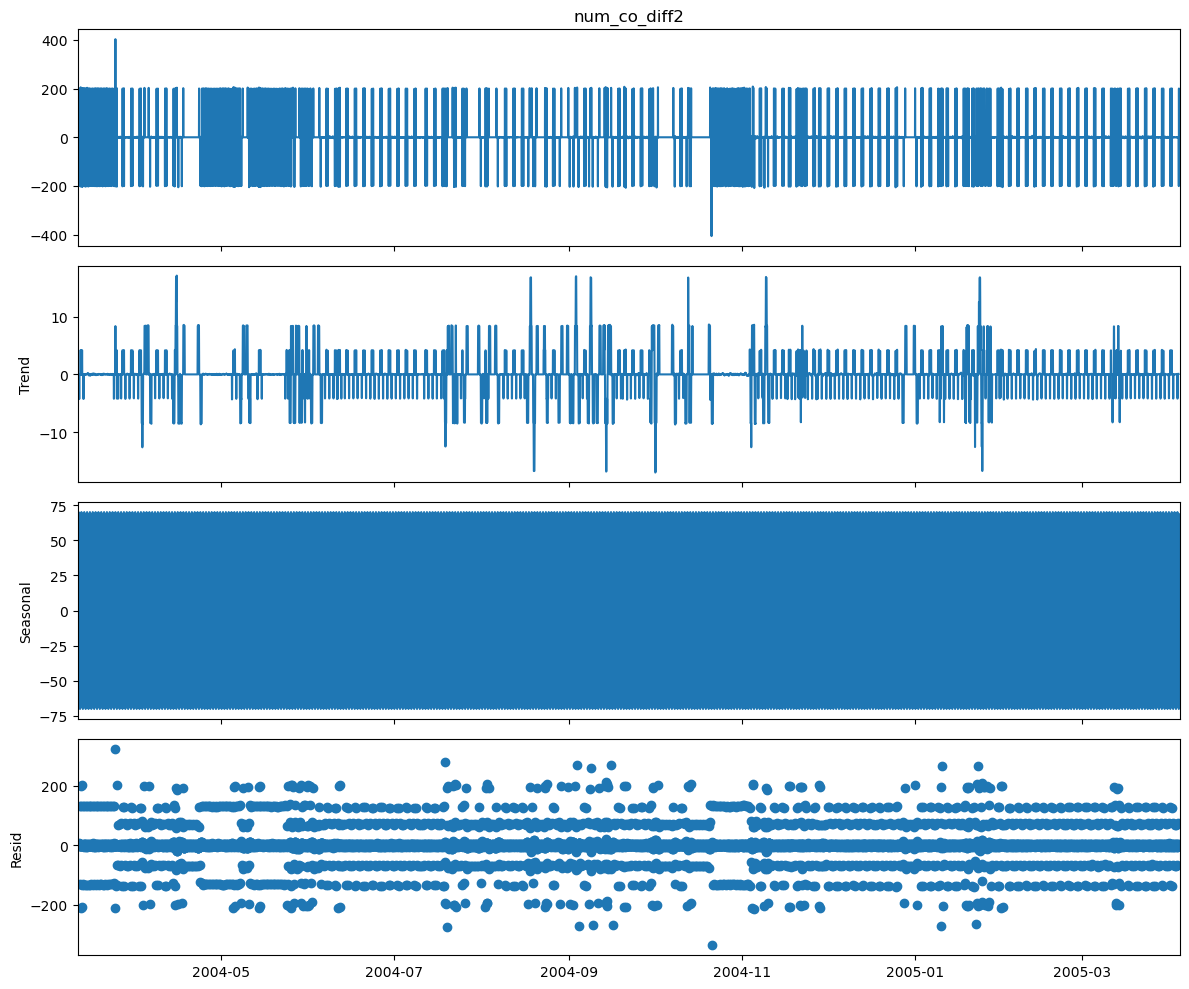

In [22]:
j = 1
data['num_co_diff2'] = data['num_co_diff'] - data['num_co_diff'].shift(j)
sm.tsa.seasonal_decompose(data['num_co_diff2'][i+j:]).plot()
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(data['num_co_diff2'][i+j:])[1])

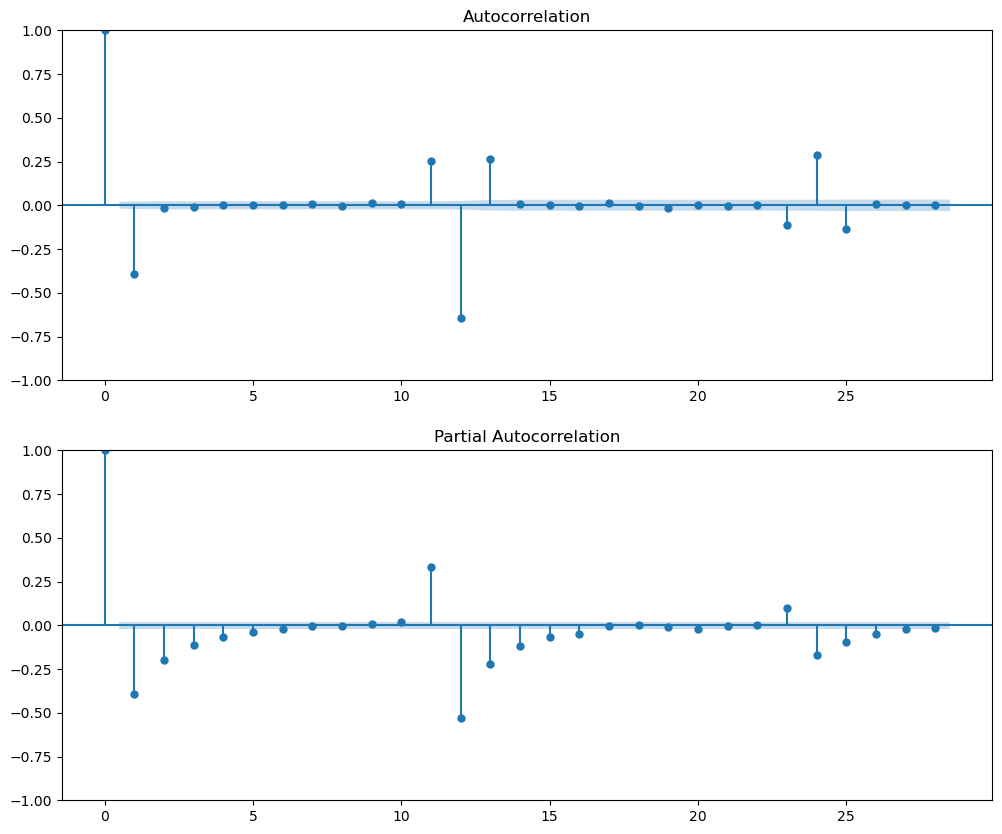

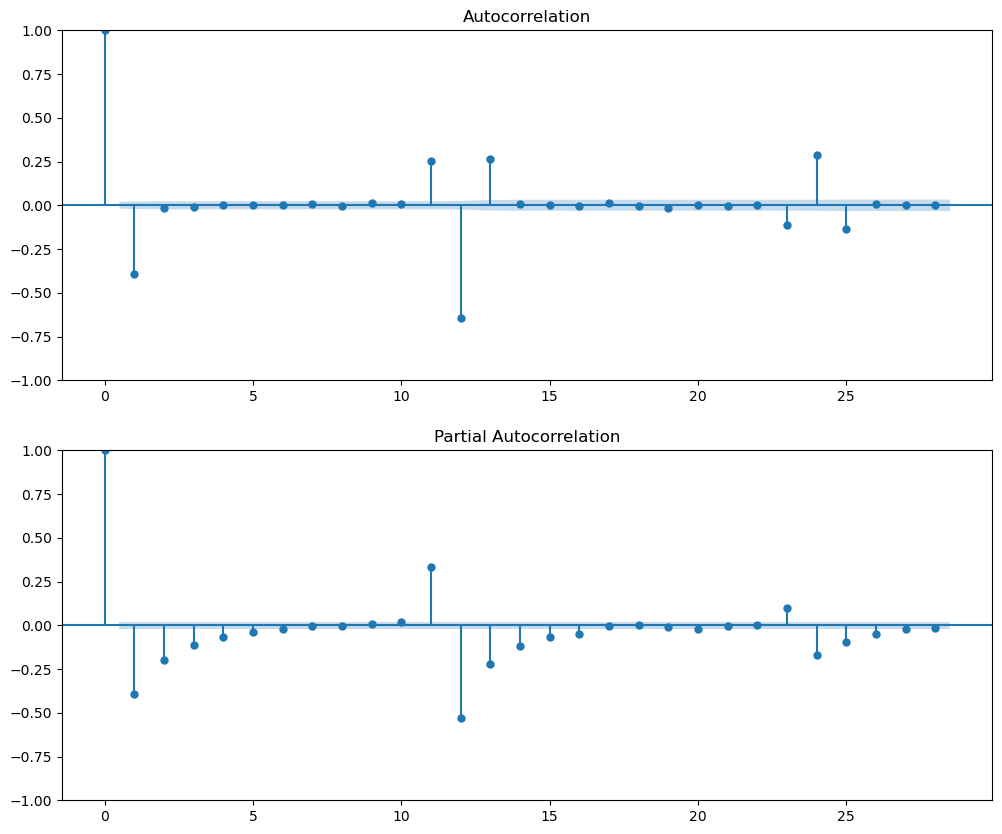

In [23]:
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(data['num_co_diff2'][i+j:].values.squeeze(), lags=28, ax=ax)
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(data['num_co_diff2'][i+j:].values.squeeze(), lags=28, ax=ax)

In [24]:
ps = range(0, 3)
d=1
qs = range(0, 1)
Ps = range(0, 3)
D=1
Qs = range(0, 3)

In [25]:
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

27

In [27]:

%%time
import warnings
results = []
best_aic = float("inf")



for param in parameters_list:
    #try except нужен, потому что на некоторых наборах параметров модель не обучается
    try:
        model=sm.tsa.statespace.SARIMAX(data['CO(GT)'], order=(param[0], d, param[1]), 
                                        seasonal_order=(param[2], D, param[3], 12)).fit(disp=-1)
    #выводим параметры, на которых модель не обучается и переходим к следующему набору
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    #сохраняем лучшую модель, aic, параметры
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])
    
warnings.filterwarnings('default')

/home/gea/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/gea/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/gea/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/gea/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/home/gea/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred fre

CPU times: user 1h 19min 29s, sys: 2min 38s, total: 1h 22min 8s
Wall time: 10min 23s


In [28]:
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())

      parameters           aic
26  (2, 0, 2, 2)  91092.287147
23  (2, 0, 1, 2)  91110.691097
17  (1, 0, 2, 2)  91408.967532
14  (1, 0, 1, 2)  91430.109474
25  (2, 0, 2, 1)  92107.874342


In [29]:
print(best_model.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                  CO(GT)   No. Observations:                 9357
Model:             SARIMAX(2, 1, 0)x(2, 1, [1, 2], 12)   Log Likelihood              -45539.144
Date:                                 Thu, 26 Oct 2023   AIC                          91092.287
Time:                                         09:47:17   BIC                          91142.285
Sample:                                     03-10-2004   HQIC                         91109.268
                                          - 04-04-2005                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4315      0.005    -95.358      0.000      -0.440      -0

Критерий Стьюдента: p=0.946898
Критерий Дики-Фуллера: p=0.000000


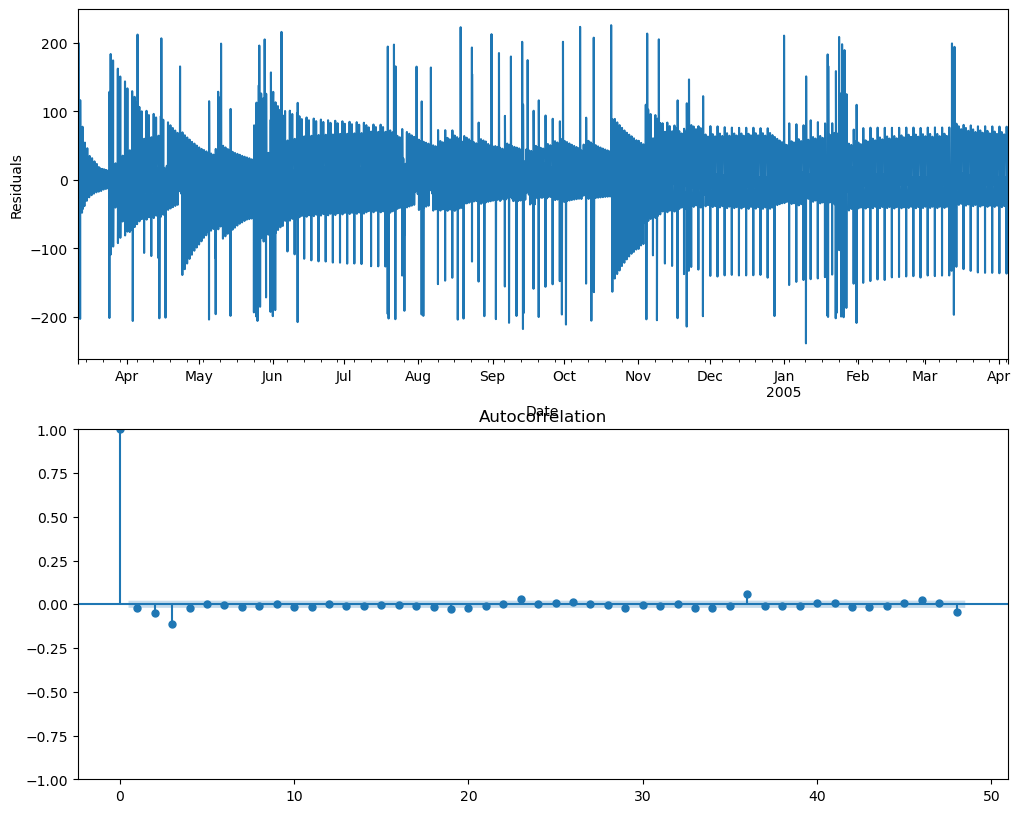

In [30]:
plt.subplot(211)
best_model.resid[i+j:].plot()
plt.ylabel(u'Residuals')

ax = plt.subplot(212)
sm.graphics.tsa.plot_acf(best_model.resid[i+j:].values.squeeze(), lags=48, ax=ax)

print("Критерий Стьюдента: p=%f" % stats.ttest_1samp(best_model.resid[i+j:], 0)[1])
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(best_model.resid[i+j:])[1])

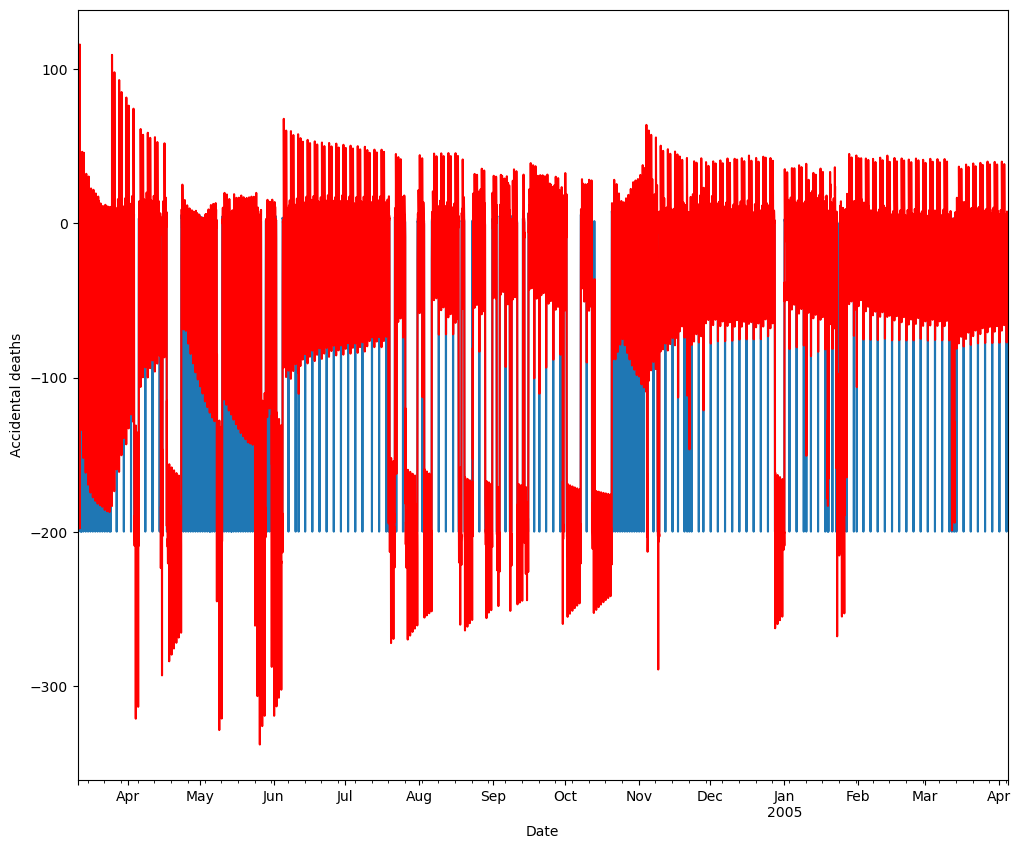

In [32]:
data['model'] = best_model.fittedvalues
data['CO(GT)'].plot()
data['model'][i+j:].plot(color='r')
plt.ylabel('Accidental deaths');

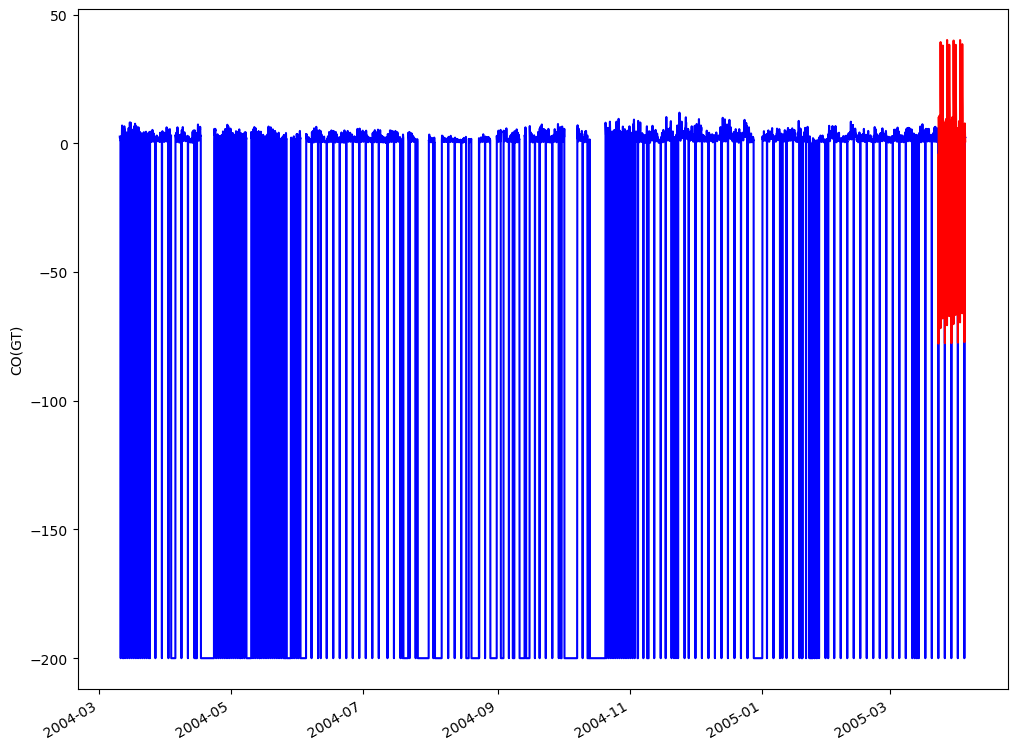

In [39]:
from dateutil.relativedelta import relativedelta
import datetime
data2 = data[['CO(GT)']]
date_list = [datetime.datetime.strptime("2022-01-01", "%Y-%m-%d") + relativedelta(months=x) for x in range(0,300)]
future = pd.DataFrame(index=date_list, columns=data2.columns)
data2 = pd.concat([data2, future])
data2['forecast'] = best_model.predict(start=9057, end=9657)

data2['CO(GT)'].plot(color='b')
data2['forecast'].plot(color='r')
plt.ylabel('CO(GT)');

In [35]:
pd.DataFrame(date_list).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   0       300 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 2.5 KB


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9357 entries, 2004-03-10 18:00:00 to 2005-04-04 14:00:00
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Time              9357 non-null   object 
 1   CO(GT)            9357 non-null   float64
 2   PT08.S1(CO)       9357 non-null   int64  
 3   NMHC(GT)          9357 non-null   int64  
 4   C6H6(GT)          9357 non-null   float64
 5   PT08.S2(NMHC)     9357 non-null   int64  
 6   NOx(GT)           9357 non-null   int64  
 7   PT08.S3(NOx)      9357 non-null   int64  
 8   NO2(GT)           9357 non-null   int64  
 9   PT08.S4(NO2)      9357 non-null   int64  
 10  PT08.S5(O3)       9357 non-null   int64  
 11  T                 9357 non-null   float64
 12  RH                9357 non-null   float64
 13  AH                9357 non-null   float64
 14  num_sunspot_diff  9307 non-null   float64
 15  num_co_diff       9345 non-null   float64
 16  num_co

In [ ]:
pd.DataFrame(future).info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 300 entries, 2022-01-01 to 2046-12-01
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sunspots  0 non-null      object
dtypes: object(1)
memory usage: 4.7+ KB


In [37]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9657 entries, 2004-03-10 18:00:00 to 2046-12-01 00:00:00
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CO(GT)    9357 non-null   float64
 1   forecast  320 non-null    float64
dtypes: float64(2)
memory usage: 226.3 KB


In [ ]:
data2.iloc[3240:3270]

,Sunspots,forecast
2019-01-31,7.7,NaN
2019-02-28,0.8,NaN
2019-03-31,9.4,NaN
2019-04-30,9.1,NaN
2019-05-31,9.9,NaN
2019-06-30,1.2,NaN
2019-07-31,0.9,4.869114
2019-08-31,0.5,3.896221
2019-09-30,1.1,0.539605
2019-10-31,0.4,-0.217377


In [ ]:
data

,Sunspots,num_sunspot_diff,num_sunspot_diff2,model
Date,,,,
1749-01-31,96.7,NaN,NaN,0.000000
1749-02-28,104.3,NaN,NaN,96.678396
1749-03-31,116.7,NaN,NaN,104.289341
1749-04-30,92.8,NaN,NaN,116.700492
1749-05-31,141.7,NaN,NaN,92.808912
...,...,...,...,...
2020-09-30,0.6,-31.8,13.6,6.785361
2020-10-31,14.4,-35.8,-22.8,3.677165
2020-11-30,34.0,-10.6,21.2,8.990661
